# Homework Set Week 6
## insert your name here

In this homework assignment please fill the indicated cells with your code and explainations, ***run*** everything (select `cell` in the menu, and click `Run all`), save the notebook with your name appended to the filename (for example, `Homework-06-shuhaocao.ipynb`), and upload it to canvas.

This homework assignment mainly concerns about regression and how to use gradient descent to find the weights. For this homework you need the following modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 1: Gradient descent in $n$-dimension

Consider the following minimization problem for $\mathbf{x}\in \mathbb{R}^n$, for a symmetric positive definite $n\times n$ matrix $A$ 
$$
\min_{\mathbf{x}\in \mathbb{R}^n} f(x) = \min_{\mathbf{x}\in \mathbb{R}^n} \left\{\frac {1}{2} \mathbf{x}^T A \mathbf{x} - \mathbf{b}^T \mathbf{x},
\right\}
$$

A straightforward computation (which will be featured in Math 110) yields:

$$
\nabla f (\mathbf{x}) = A\mathbf{x} -\mathbf{b}.
$$

Hence the gradient descent algorithm reads:
> Choose initial guess $\mathbf{x}_0$ and learning rate $\eta$<br><br>
>    For $k=0,1,2, \cdots, M$<br><br>
>    &nbsp;&nbsp;&nbsp;&nbsp;    $\mathbf{x}_{k+1} =  \mathbf{x}_k - \eta\big( A\mathbf{x}_k -\mathbf{b}\big)$

which recovers the famous [Richardson iteration](https://en.wikipedia.org/wiki/Modified_Richardson_iteration) to solve a linear system.

In this problem, our $A$ is a Laplacian matrix of a directed graph, and graph theory is widely used to explain the approximation capability of a neural network. Our $A$ can be generated by the following routine using the adjacency matrix $G$ (representing the connected edges between nodes).

In [2]:
from scipy.sparse import csgraph
G = np.array([[0,  1,  0,  1,  1],  
              [1,  0,  1,  1,  1], 
              [0,  1,  0,  1,  0], 
              [1,  1,  1,  0,  1], 
              [1,  1,  0,  1,  0]])
A = csgraph.laplacian(G, normed=True)
A

array([[ 1.        , -0.28867513, -0.        , -0.28867513, -0.33333333],
       [-0.28867513,  1.        , -0.35355339, -0.25      , -0.28867513],
       [-0.        , -0.35355339,  1.        , -0.35355339, -0.        ],
       [-0.28867513, -0.25      , -0.35355339,  1.        , -0.28867513],
       [-0.33333333, -0.28867513, -0.        , -0.28867513,  1.        ]])

## Question of problem 1:
Apply the gradient descent algorithm to minimize $\frac {1}{2} \mathbf{x}^T A \mathbf{x} - \mathbf{b}^T \mathbf{x}$ for the matrix $A$ above, and $\mathbf{b}$ is randomly generated by `np.random.normal()`.

In [ ]:
# your code here

# Problem 2: Overfitting

Consider the following synthetic data set generated by $y=x^2$ with random noise.

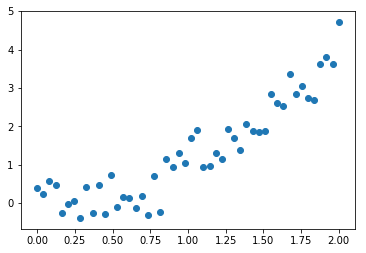

In [3]:
np.random.seed(666)
num_samples = 50
X = np.linspace(0,2,num_samples)
y = X**2 + np.random.normal(0,0.5, size=num_samples)
plt.scatter(X, y)
plt.show()

## A customized class from scikit-learn

Below are the code of a class called `PolyFitter` that uses the built-in linear regression model in `scikit-learn` to fit not just a linear function but a polynomial function of any degree, e.g. $f(x) = w_{10}x^{10} + w_9x^9 + \dots + b$, to the data. 


The code constructs a fit to a general polynomial. Not just the linear moments, it considers the moments in $x^2$, $x^3$, $\dots$ to the model as if they were extra information about the data points. 

Optional: Read the `_augment_input_()` function below and the [Vandermonde matrix formulation](https://en.wikipedia.org/wiki/Polynomial_regression#Matrix_form_and_calculation_of_estimates) for more information.

In [4]:
from sklearn import linear_model

class PolyFitter():
    
    def __init__(self, degree):
        self.degree = degree
        self.model = linear_model.LinearRegression() # initialize using the LinearRegression() class
    
    def train(self, X, y):
        X_aug = self._augment_input_(X)
        self.model.fit(X_aug, y)

    def predict(self, X):
        X_aug = self._augment_input_(X)
        return self.model.predict(X_aug)
    
    def _augment_input_(self, X): 
        # this function essentially add x^2, x^3, etc to the data points
        N = X.shape[0]
        k = self.degree
        X_aug = np.zeros([N,k])
        X_aug[:,0] = X[:]
        for i in range(1,k):
            X_aug[:, i] = X * X_aug[:, i-1]
        return X_aug
    
    def plot(self, X, y):
        XX = np.linspace(-2,5,600)
        yy = self.predict(XX)
        plt.scatter(X, y, s=100, alpha=0.4)
        plt.axis('tight')
        plt.plot(XX,yy,'red')
        plt.show()
        
    def mean_squared_error(self,X,y):
        # your code here (see instructions below)
        # you should use the predict function above
        # delete the pass line when submitting
        pass

Here is how to use `PolyFitter`:

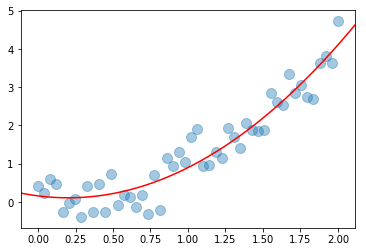

In [5]:
model = PolyFitter(2)
model.train(X, y)
model.plot(X, y)

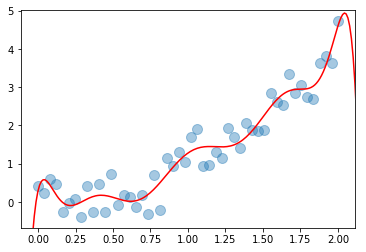

In [6]:
model = PolyFitter(10)
model.train(X, y)
model.plot(X, y)

As you can see, picking a high degree polynomial fits the data much more precisely at certain points. But clearly, this high-degree approximation is not really capturing the essence of this data-set. This is called **overfitting**.

Problem 2 contains the following question:

* Write the `mean_squared_error(X, y)` function in the class. It should return the average of the square of the difference between the model's predictions (obtained using `self.predict(X)`) and the given answers `y` (this is called "ground truth" in many machine learning literature ). This will allow us to see how our model is doing.

* Generate a new set of data with 1000 points using $y=x^2$ plus normal random noise like in the beginning. Split the data into 75% training examples and 25% test examples. You don't need to shuffe the data, just split it into two parts. If you want to shuffle the data, you can use the following [split routine from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
```
Alternatively, you can manually make four numpy arrays: `X_train`, `y_train`, `X_test` and `y_test`  from `X` and `y`. The training arrays should contain the $x$ and $y$ coordinates of 75% of data-points while the test arrays should contain the remaining 25%. We will use the training samples to train the model, and the test pair to see how our model is doing on data that it has not seen before (the test data). This is a standard method for avoiding the mistake of making models that work really well during development, but then work very badly when they see data they have never seen before.
    
* For each degree $d = 1,2,\dots,10$: train a `model = PolyFitter(d)` with the data `X_train`, `y_train`; compare the fitted curve with the data using `model.plot()`.

* Compute the *training errors* (the MSE for the `X_train`'s model prediction and `y_train`); and the *test errors* (the MSE between `X_test`'s model prediction and `y_test`) for $d=1,\dots,10$. 

* Plot the *training errors* and *test errors* computed above as a function of $d=1,\dots,10$.  

You should notice that as the degree increases, the training error goes down a lot, which means that our model is becoming very good at fitting to the training data. But, for the test data, it gets worse and worse after some point. What's the best degree for this data-set?  

In [ ]:
# your code here